In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [89]:
df=pd.read_csv(r'banking-full.csv',delimiter=";")

In [90]:
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [91]:
#We can see more values as "unknown", so we are converting it as null values
df.replace("unknown",np.nan, inplace=True)

In [92]:
# Check for missing values
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [93]:
# since the column "poutcome" have more null values we can drop the column 
df.drop(columns=['poutcome'],inplace=True)
#dropping irrelevent column days
#df.drop(columns=['day'],inplace=True)


In [94]:
#Getting the mode of eacah columns to replace the null values
print("Mode of column job: " ,df['job'].mode())
print("Mode of column education: " ,df['education'].mode())
print("Mode of column contact: " ,df['contact'].mode())

Mode of column job:  0    blue-collar
Name: job, dtype: object
Mode of column education:  0    secondary
Name: education, dtype: object
Mode of column contact:  0    cellular
Name: contact, dtype: object


In [95]:
df['job'].fillna('blue-collar',inplace=True)
df['education'].fillna('secondary',inplace=True)
df['contact'].fillna('cellular',inplace=True)


In [96]:
#rechecking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [97]:
# Summary statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [98]:
# Set style for plots
sns.set_style("whitegrid")

In [99]:
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]


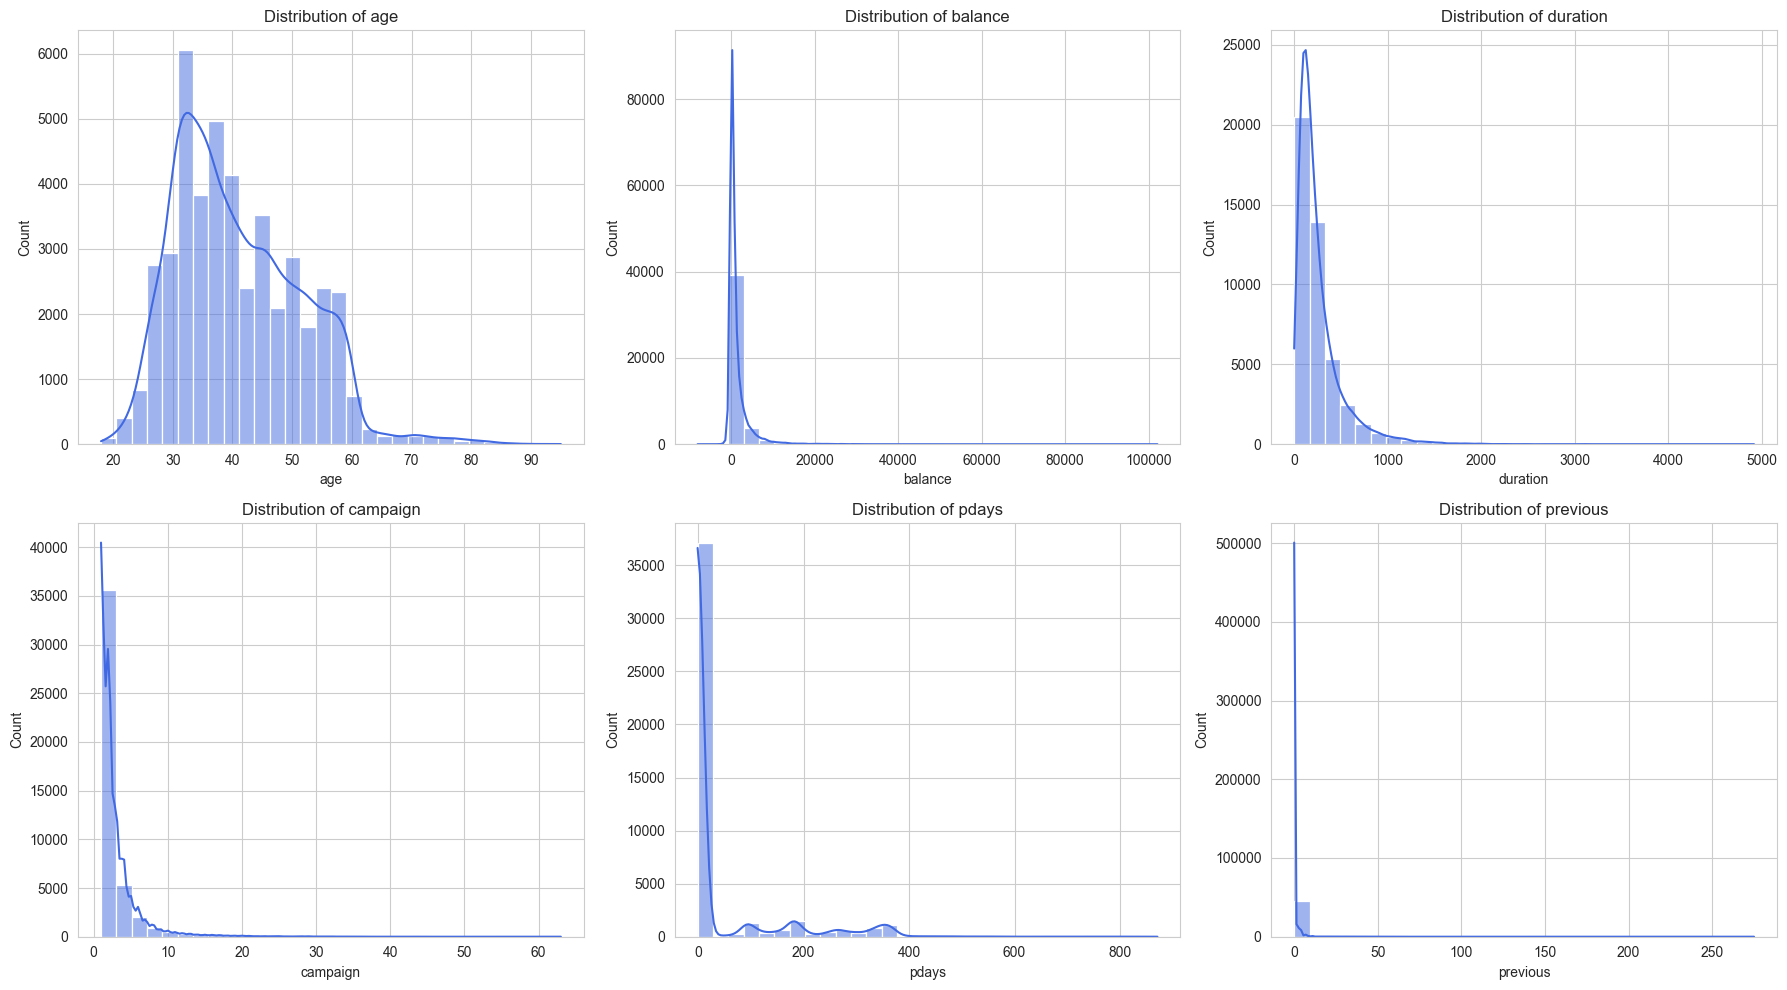

In [100]:
# 1. Distribution of Numerical Features
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

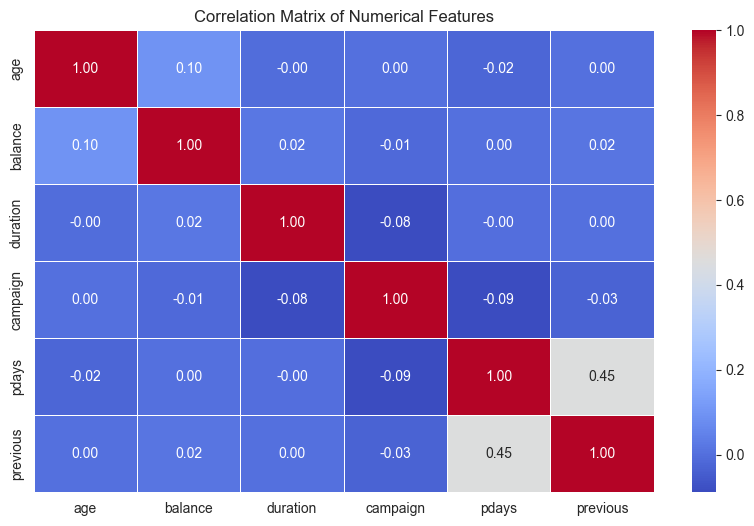

In [101]:
# 2. Correlation Matrix
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


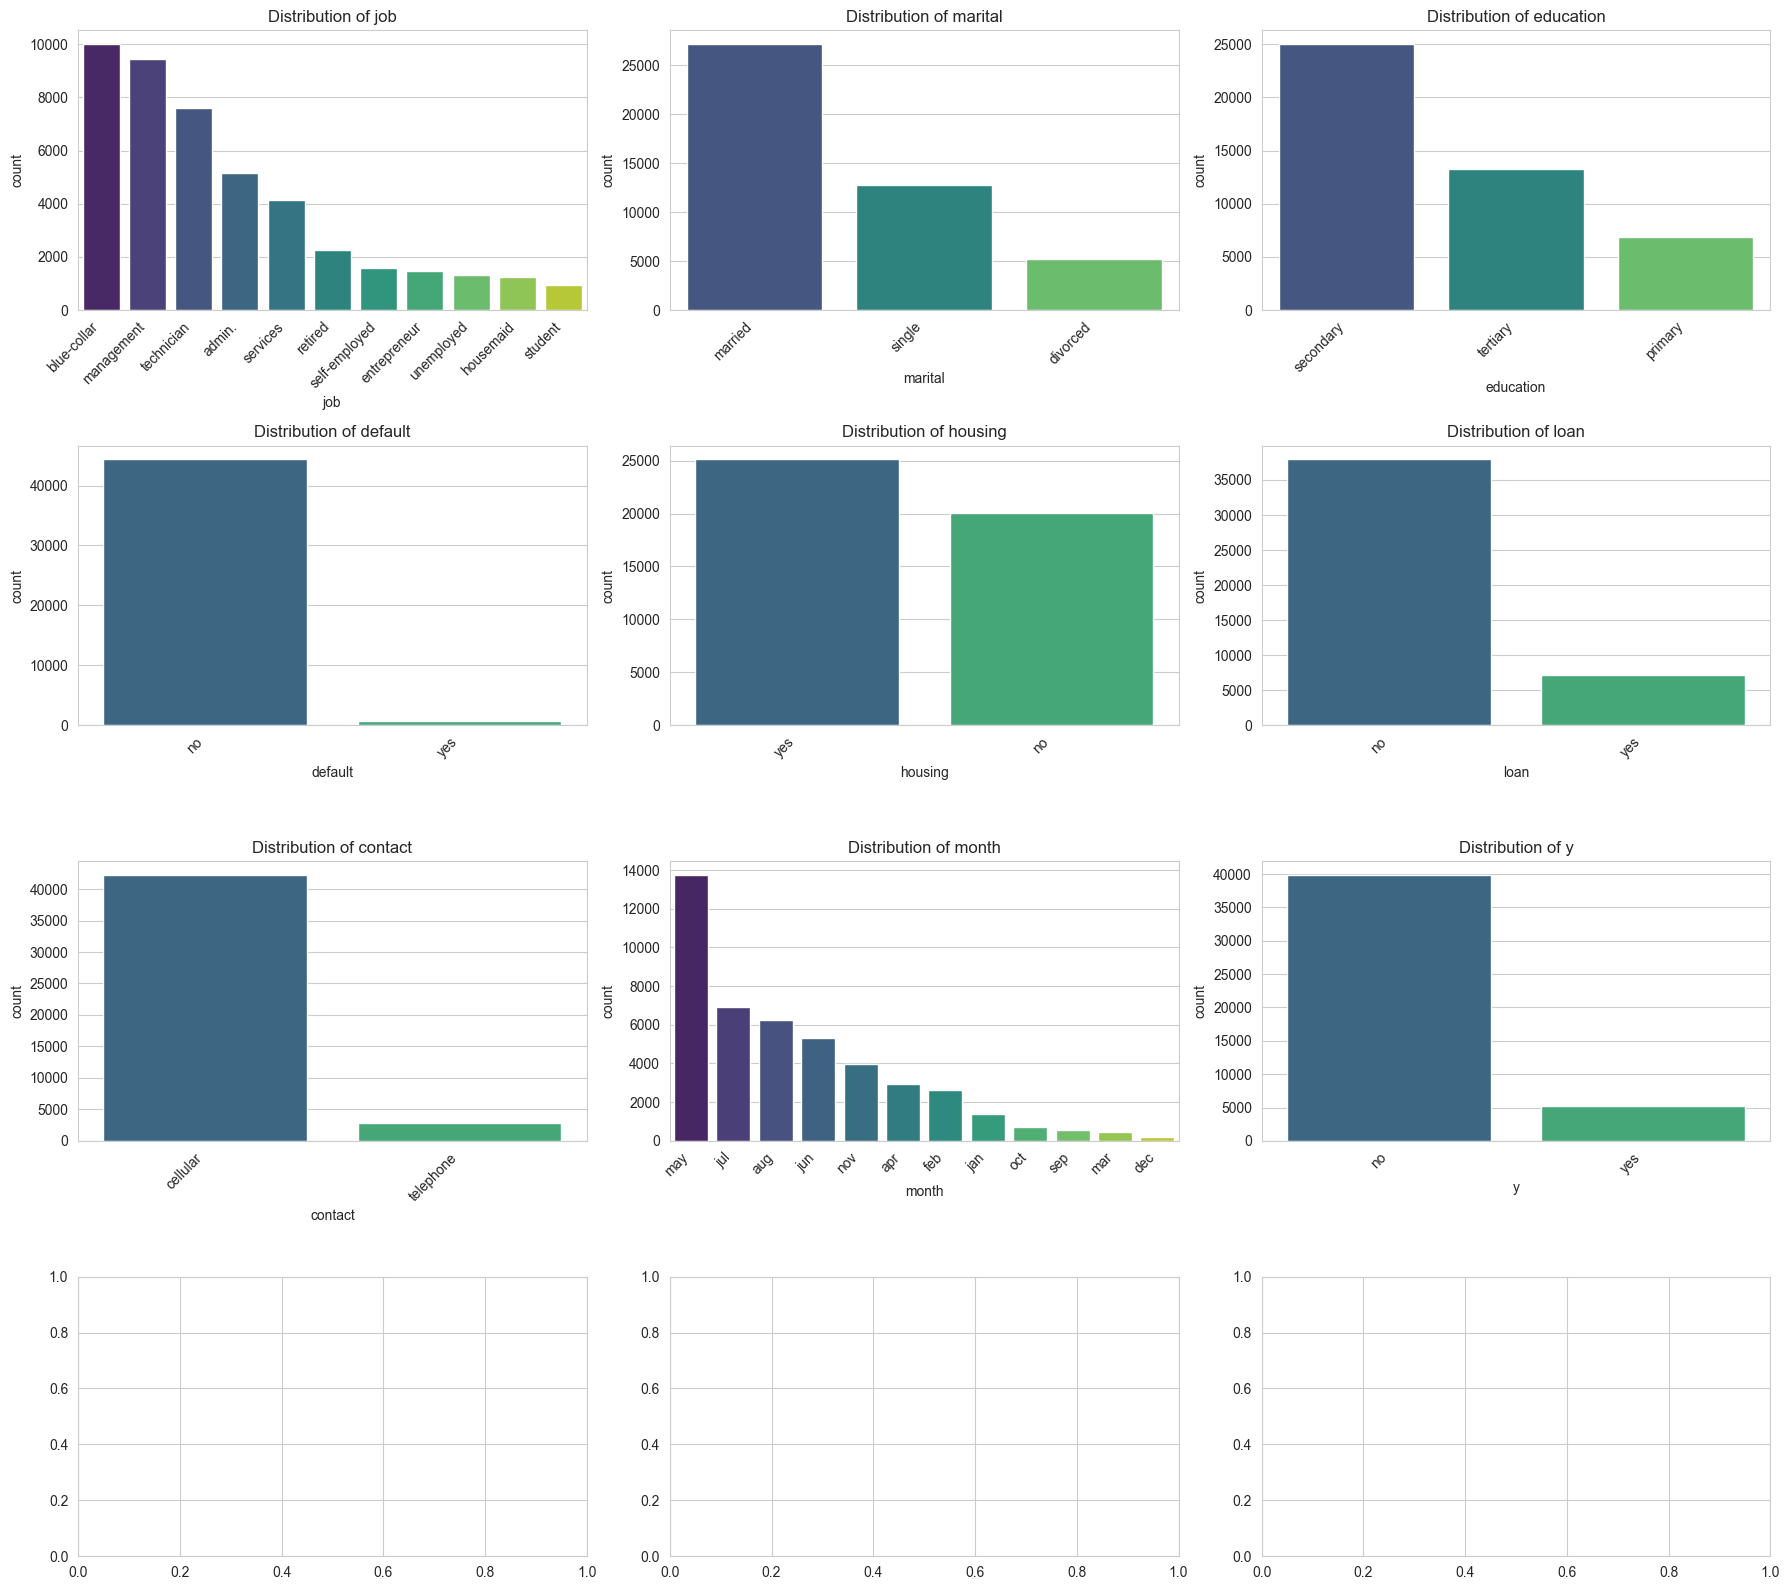

In [102]:
# 3. Categorical Feature Distributions
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "y"]

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, palette="viridis", ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

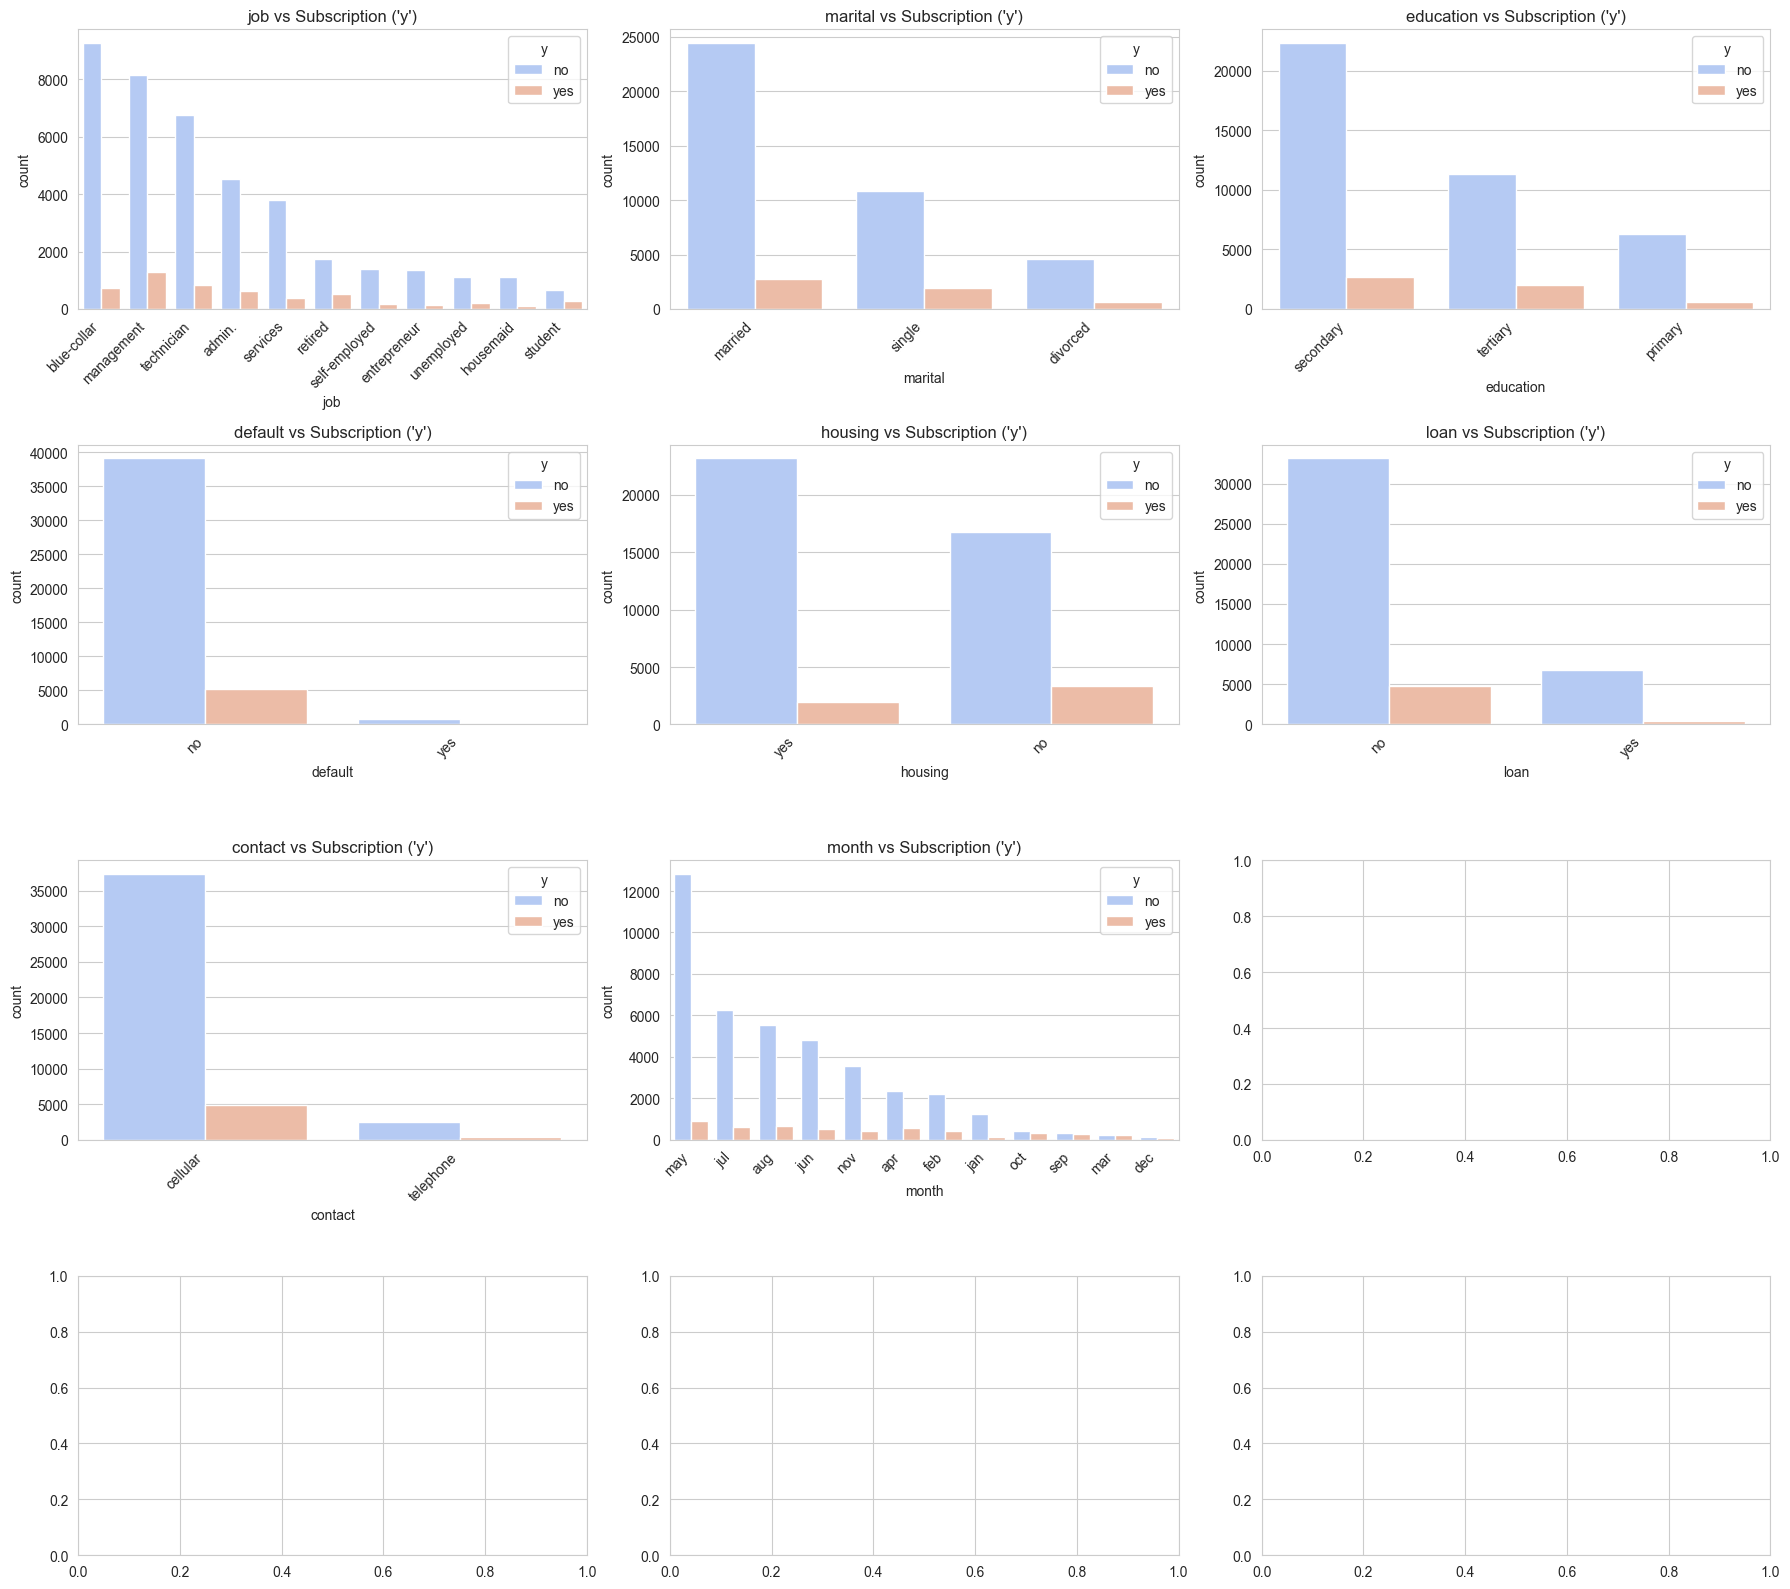

In [103]:
# 4. Relationship between Categorical Features and Target Variable 'y'
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:-1]):  # Exclude 'y' itself
    sns.countplot(data=df, x=col, hue="y", palette="coolwarm", ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"{col} vs Subscription ('y')")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [113]:
# Identify Outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [114]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

In [115]:
# Numerical columns for outlier detection
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
df = remove_outliers(df, num_cols)

In [119]:
# Encode categorical variables
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "y"]
df_encoded = df.copy()
label_encoders = {}

In [120]:
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [121]:
# Split dataset into features and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]


In [122]:
# Standardize numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [123]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [125]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.9572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4587
           1       0.33      0.01      0.03       202

    accuracy                           0.96      4789
   macro avg       0.65      0.51      0.50      4789
weighted avg       0.93      0.96      0.94      4789


Decision Tree Accuracy: 0.9376
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4587
           1       0.30      0.35      0.32       202

    accuracy                           0.94      4789
   macro avg       0.63      0.66      0.64      4789
weighted avg       0.94      0.94      0.94      4789


Random Forest Accuracy: 0.9576
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4587
           1       0.48      0.07      0.12       202

    accuracy                           0.96      4789
   macro avg       0.72   

In [126]:
# Deep Learning Model
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Evaluate Deep Learning Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nDeep Learning Model Accuracy: {test_acc:.4f}")

Epoch 1/20
599/599 [==============================] - 4s 4ms/step - loss: 0.2045 - accuracy: 0.9501 - val_loss: 0.1661 - val_accuracy: 0.9576
Epoch 2/20
599/599 [==============================] - 2s 3ms/step - loss: 0.1656 - accuracy: 0.9557 - val_loss: 0.1584 - val_accuracy: 0.9578
Epoch 3/20
599/599 [==============================] - 2s 3ms/step - loss: 0.1589 - accuracy: 0.9560 - val_loss: 0.1518 - val_accuracy: 0.9578
Epoch 4/20
599/599 [==============================] - 2s 3ms/step - loss: 0.1555 - accuracy: 0.9558 - val_loss: 0.1521 - val_accuracy: 0.9578
Epoch 5/20
599/599 [==============================] - 2s 3ms/step - loss: 0.1516 - accuracy: 0.9560 - val_loss: 0.1495 - val_accuracy: 0.9578
Epoch 6/20
599/599 [==============================] - 2s 3ms/step - loss: 0.1494 - accuracy: 0.9562 - val_loss: 0.1476 - val_accuracy: 0.9578
Epoch 7/20
599/599 [==============================] - 2s 3ms/step - loss: 0.1486 - accuracy: 0.9560 - val_loss: 0.1460 - val_accuracy: 0.9580
Epoch 